<a href="https://colab.research.google.com/github/NurmuhammadAbduqahhorov/portfolio/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics 


About Dataset

In [52]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
df.shape

(7043, 21)

In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [58]:
# 'customerID' ustunini o'chirib tashlayman, chunki bashorat uchun bu ustun yordam bermaydi.
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
# 'TotalCharges' ustunini son ko'rinishiga o'tqizaman
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [61]:
df.isnull().sum()
# 'TotalCharges' ustunini son ko'rinishiga o'tqizganimizdan keyin mavjud bo'lmagan qatorlar borligi ko'rindi

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [62]:
# Nan qiymati bor qatorlar soni kam bo'lganligi uchun ularni o'chirib tashlayman
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)

In [63]:
# DataFrameni qaytadan indexlayman
df.reset_index(inplace=True)

In [64]:
df.shape

(7032, 21)

Visualization

In [65]:
df.corr()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
index,1.000000,0.008057,0.006801,-0.012938,0.001820
SeniorCitizen,0.008057,1.000000,0.015683,0.219874,0.102411
tenure,0.006801,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,-0.012938,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.001820,0.102411,0.825880,0.651065,1.000000


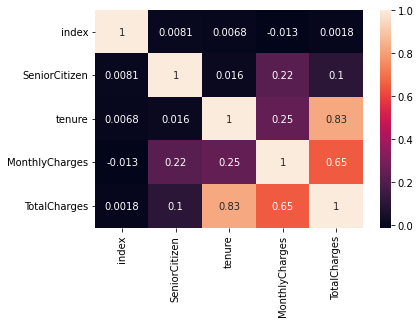

In [66]:
sns.heatmap(df.corr(), annot=True)
plt.show()


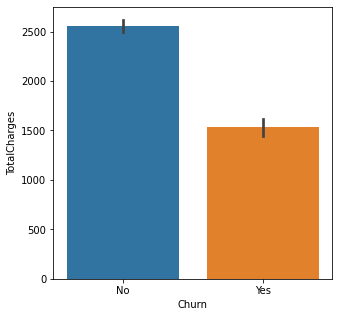

In [67]:
plt.figure(figsize=(5, 5))
sns.barplot(data = df, y="TotalCharges", x="Churn")
plt.show()

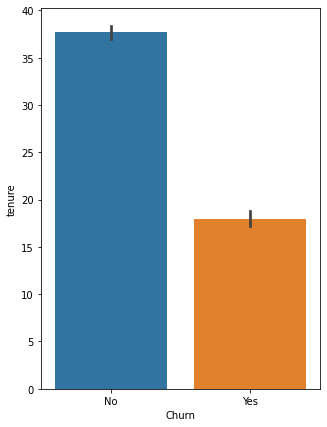

In [68]:
plt.figure(figsize=(5, 7))
sns.barplot(data = df, x="Churn", y="tenure")
plt.show()

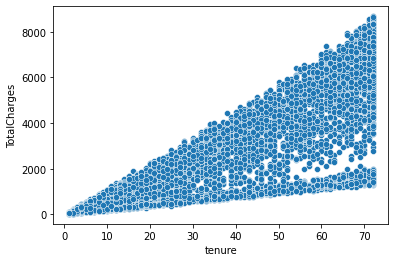

In [69]:
sns.scatterplot(data=df, x="tenure", y="TotalCharges")
plt.show()

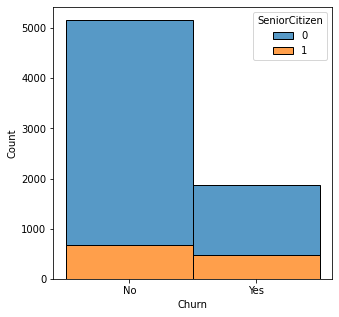

In [70]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="Churn", hue='SeniorCitizen',multiple="stack" )
plt.show()


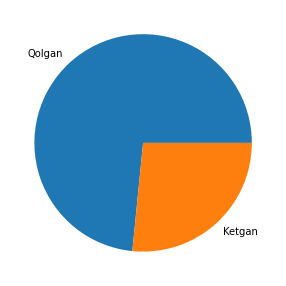

In [71]:
churn_rate = df['Churn'].value_counts()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

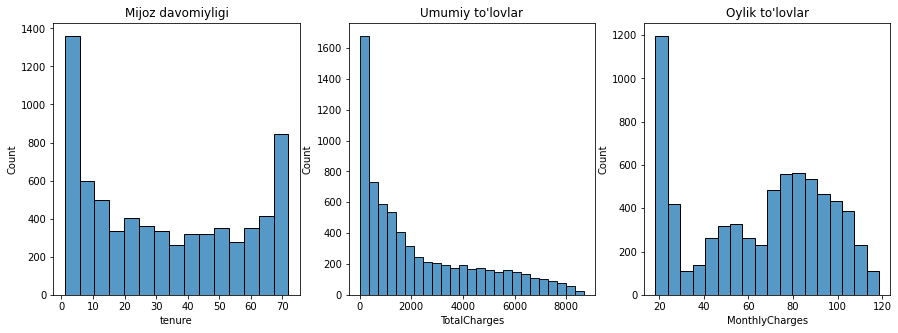

In [72]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#TotalCharges
sns.histplot(x="TotalCharges", data=df, ax=axes[1])
axes[1].set_title("Umumiy to'lovlar")

# MonthlyCharges
sns.histplot(x="MonthlyCharges", data=df, ax=axes[2])
axes[2].set_title("Oylik to'lovlar")

plt.show()

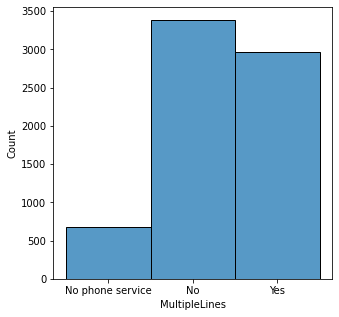

In [73]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="MultipleLines" )
plt.show()


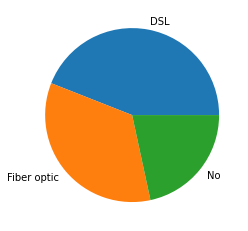

In [74]:
labels = df['InternetService'].unique()
values = df['InternetService'].value_counts()



plt.pie(x=values,labels=labels)
plt.show()

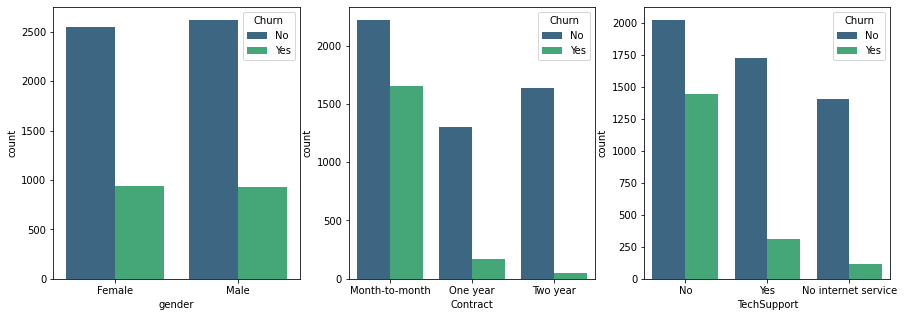

In [75]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='gender', hue='Churn', palette='viridis', data=df, ax=axes[0])


sns.countplot(x='Contract', hue='Churn', palette='viridis', data=df, ax=axes[1])


sns.countplot(x='TechSupport', hue='Churn', palette='viridis', data=df, ax=axes[2])

plt.show()

Preprocessing Data

In [76]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [77]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [78]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,0,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [80]:
# Qiymatlari xossalari 2 dan ko'p bolgan ustunlar
for i in df.columns:
    if (len(df[i].unique()) >2) & (df[i].dtypes != "int64") &(df[i].dtypes!= "float64"):
        print(i)

InternetService
Contract
PaymentMethod


In [81]:
# Bu ustunlarni son ko'rinishiga o'tqizamiz
more_than_two = ['InternetService','Contract','PaymentMethod']
df= pd.get_dummies(data= df, columns=more_than_two)
df.dtypes

index                                        int64
gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [83]:
df.shape

(7032, 28)

In [84]:
# Qolgan object type dagi ustunlar
for i in df.columns:
    if (df[i].dtypes == "object"):
        print(i)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [85]:
# Bu ustunlarni ham son ko'rinishiga o'tqizamiz
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,3,0,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,4,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [97]:
df.drop('index', axis=1, inplace=True)

In [106]:
# Katta qiymatga ega bo'gan ustunlarni ham 0-1 oraliqqa keltirib olamiz
scaler = MinMaxScaler()
large_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[large_cols] = scaler.fit_transform(df[large_cols])
df[large_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [108]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [111]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [112]:
# Ma'lumotlarni train va test qismalrga bo'lin olamiz
X = df.drop('Churn', axis=1)
y = df['Churn']

In [113]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

**Model Building**

Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.54      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321

Model aniqligi: 80.00861697544161


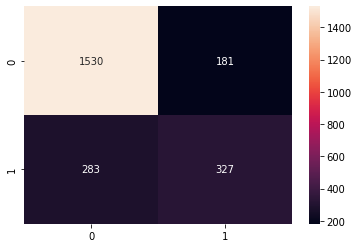

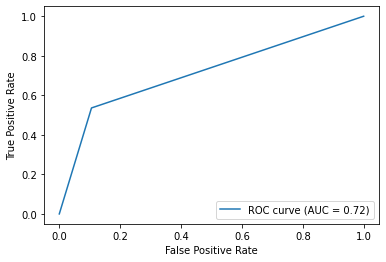

In [127]:
# Training model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred_log = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_log))
lg=metrics.accuracy_score(y_test,y_pred_log)*100
print("Model aniqligi:", lg )

# Confusion matrix
conf_mat_log = metrics.confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_mat_log, annot=True, fmt='g')
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


Support Vector Machines

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1711
           1       0.65      0.50      0.57       610

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321

Model aniqligi: 79.83627746660922


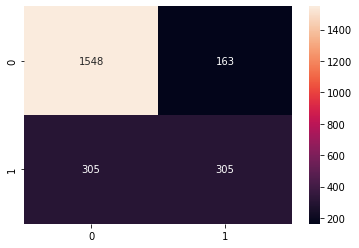

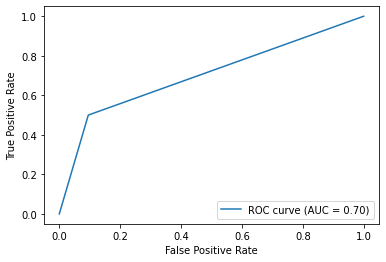

In [128]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred_svm = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_svm))
svm = metrics.accuracy_score(y_test,y_pred_svm)*100
print("Model aniqligi:", svm)

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_svm)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1711
           1       0.47      0.51      0.49       610

    accuracy                           0.72      2321
   macro avg       0.65      0.65      0.65      2321
weighted avg       0.73      0.72      0.73      2321

Model aniqligi: 72.25333907798363


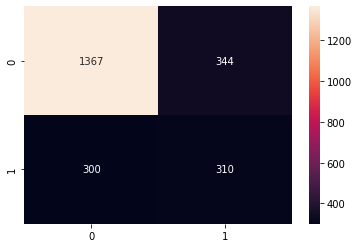

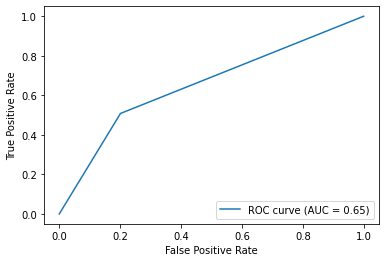

In [129]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred_tree = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_tree))
tree=metrics.accuracy_score(y_test,y_pred_tree)*100
print("Model aniqligi:", tree)

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_tree)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1711
           1       0.59      0.49      0.54       610

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.77      0.78      0.77      2321

Model aniqligi: 77.81128823782852


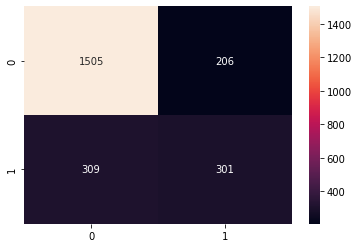

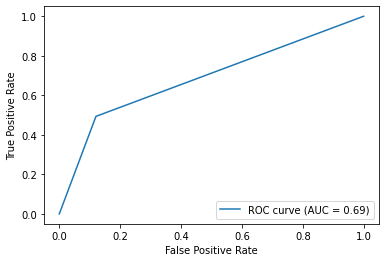

In [130]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred_rf = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_rf))
rf=metrics.accuracy_score(y_test,y_pred_rf)*100
print("Model aniqligi:", rf)

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1711
           1       0.66      0.52      0.58       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.79      0.80      0.80      2321

Model aniqligi: 80.48255062473072


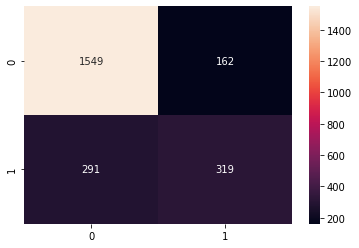

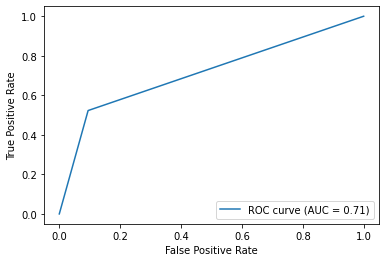

In [131]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred_xgb = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_xgb))
xgb=metrics.accuracy_score(y_test,y_pred_xgb)*100
print("Model aniqligi:", xgb)

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

,Model,Accuracy_score
4,XGBoost,80.482551
0,Logistic Regression,80.008617
1,Supper Vector Machine,79.836277
3,Random Forest,77.811288
2,Decision Tree,72.253339


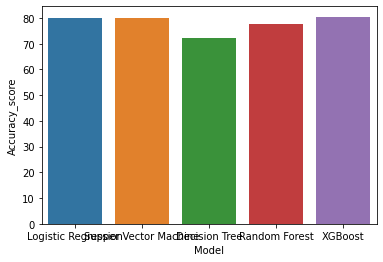

In [135]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Supper Vector Machine', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy_score' :[lg, svm,tree, rf, xgb]
})
models
sns.barplot(x='Model', y='Accuracy_score', data=models)

models.sort_values(by='Accuracy_score', ascending=False)